# Data Loading and Initial Check

In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("crop_yield_cleaned.csv")
dataset

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
...,...,...,...,...,...,...,...,...,...,...
999984,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586
999985,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594
999986,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182
999987,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159


# Null Value Check

In [3]:
dataset.isnull().sum()

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

# COVARIANCE

In [4]:
numeric_data = dataset.select_dtypes(include='number')
covariance_matrix = numeric_data.cov()
covariance_matrix

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
Rainfall_mm,67522.734903,-0.233941,-17.993022,337.087022
Temperature_Celsius,-0.233941,52.137242,-0.136217,1.048146
Days_to_Harvest,-17.993022,-0.136217,673.580518,-0.113930
Yield_tons_per_hectare,337.087022,1.048146,-0.113930,2.878363


# CORRELATION

In [5]:
#A positive covariance indicates that as one variable increases, the other tends to increase as well. Conversely, as one variable decreases, the other tends to decrease.   
#A negative covariance indicates that as one variable increases, the other tends to decrease, and vice versa.   
#A covariance close to zero suggests that there's little to no linear relationship between the variables.   

In [6]:
numeric_data = dataset.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()
correlation_matrix

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
Rainfall_mm,1.000000,-0.000125,-0.002668,0.764618
Temperature_Celsius,-0.000125,1.000000,-0.000727,0.085561
Days_to_Harvest,-0.002668,-0.000727,1.000000,-0.002587
Yield_tons_per_hectare,0.764618,0.085561,-0.002587,1.000000


# VARIANCE INFLATION FACTIOR (VIF)

In [7]:
#The VIF measures how much the variance of an estimated regression coefficient is increased because of multicollinearity.   
#In simpler terms, it tells you how much the presence of other independent variables inflates the standard error of a particular variable's coefficient.

In [8]:
import seaborn as sns

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)
calc_vif(dataset[['Rainfall_mm','Temperature_Celsius','Days_to_Harvest','Yield_tons_per_hectare']])

,variables,VIF
0,Rainfall_mm,13.273572
1,Temperature_Celsius,10.342186
2,Days_to_Harvest,9.801475
3,Yield_tons_per_hectare,19.997558


# T-TEST

In [10]:
#The primary goal of a t-test is to assess whether the observed difference between two group means is likely due to a real effect or simply due to random chance.
#T-tests are appropriate when you want to compare the means of two groups.

In [11]:
#independent sample-unpaired t-test

In [12]:
#diffent group(true,false)but same condition(Yield_tons_per_hectare)

In [13]:
from scipy.stats import ttest_ind
cloud=dataset[dataset['Weather_Condition']=='Cloudy']['Yield_tons_per_hectare']
sunny=dataset[dataset['Weather_Condition']=='Sunny']['Yield_tons_per_hectare']
ttest_ind(cloud,sunny)

TtestResult(statistic=-1.1340157673070013, pvalue=0.25678834211204454, df=666426.0)

In [14]:
from scipy.stats import ttest_ind
rainy=dataset[dataset['Weather_Condition']=='Rainy']['Yield_tons_per_hectare']
sunny=dataset[dataset['Weather_Condition']=='Sunny']['Yield_tons_per_hectare']
ttest_ind(rainy,sunny)

TtestResult(statistic=-0.6394408863870144, pvalue=0.5225363773755358, df=667342.0)

In [15]:
sandy=dataset[dataset['Soil_Type']=='Sandy']['Yield_tons_per_hectare']
loam=dataset[dataset['Soil_Type']=='Loam']['Yield_tons_per_hectare']
ttest_ind(sandy,loam)

TtestResult(statistic=-0.4371899820071523, pvalue=0.6619738571405351, df=333908.0)

In [16]:
clay=dataset[dataset['Soil_Type']=='Clay']['Yield_tons_per_hectare']
silt=dataset[dataset['Soil_Type']=='Silt']['Yield_tons_per_hectare']
ttest_ind(clay,silt)

TtestResult(statistic=-0.6019036712577365, pvalue=0.547238670116807, df=333018.0)

# ANOVA

In [17]:
#one way anavo
#One-way analysis of variance (ANOVA) is a statistical method that compares the means of two or more group
#It calculates an F ratio, which indicates whether there is more variability between groups than within groups

In [18]:
import scipy.stats as stats
stats.f_oneway(dataset['Days_to_Harvest'],dataset['Temperature_Celsius'],dataset['Rainfall_mm'])


F_onewayResult(statistic=3497247.5486455997, pvalue=0.0)

In [19]:
#two way anavo 
#A two-way analysis of variance (ANOVA) is a statistical method that analyzes how two categorical variables affect a continuous variable.
#Calculate the sum of squares, degrees of freedom, mean squares, and the F-value

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Yield_tons_per_hectare ~ Temperature_Celsius + Rainfall_mm + Temperature_Celsius:Rainfall_mm', data=dataset).fit()

In [21]:
anova_table = sm.stats.anova_lm(model, typ=2)

In [22]:
anova_table

,sum_sq,df,F,PR(>F)
Temperature_Celsius,2.111823e+04,1.0,1.798157e+04,0.000000
Rainfall_mm,1.682833e+06,1.0,1.432884e+06,0.000000
Temperature_Celsius:Rainfall_mm,4.440558e+00,1.0,3.781008e+00,0.051838
Residual,1.174420e+06,999985.0,NaN,NaN


# Crop Count Summary

In [23]:
crop_count = (dataset['Crop'] == "Cotton").sum()
rice_count = (dataset['Crop'] == "Rice").sum()
soybean_count = (dataset['Crop'] == "Soybean").sum()
maize_count = (dataset['Crop'] == "Maize").sum()
print("Crop Count:", crop_count)
print("Rice Count:", rice_count)
print("Soybean Count:", soybean_count)
print("maize Count:", maize_count)

Crop Count: 166583
Rice Count: 166790
Soybean Count: 166349
maize Count: 166820


# Yield Statistics

In [24]:
selected_data = dataset[["Crop", "Yield_tons_per_hectare"]]

# Calculate the maximum salary
max_yields = selected_data['Yield_tons_per_hectare'].max()

# Calculate the minimum salary
min_yields = selected_data['Yield_tons_per_hectare'].min()

# Calculate the average salary
avg_yields = selected_data['Yield_tons_per_hectare'].mean() 

# Print the results
print("Maximum yields:", max_yields)
print("Minimum yields:", min_yields)
print("Average yields:", avg_yields)

Maximum yields: 9.963372229
Minimum yields: -1.147613223
Average yields: 4.649478955710318


# Jointplot – Days to Harvest vs Yield

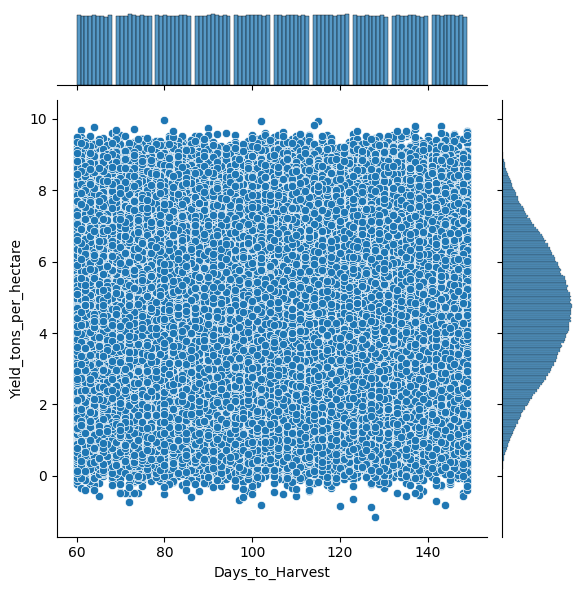

In [25]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.jointplot(x='Days_to_Harvest',y='Yield_tons_per_hectare',data=dataset)
plt.show()

In [26]:
# This joint plot displays the relationship between the number of days to harvest and the crop yield (in tons per hectare).
# The scatter distribution suggests minimal correlation, indicating that harvest time may not be a strong predictor of yield.

# Strip Plots – Crop vs Yield

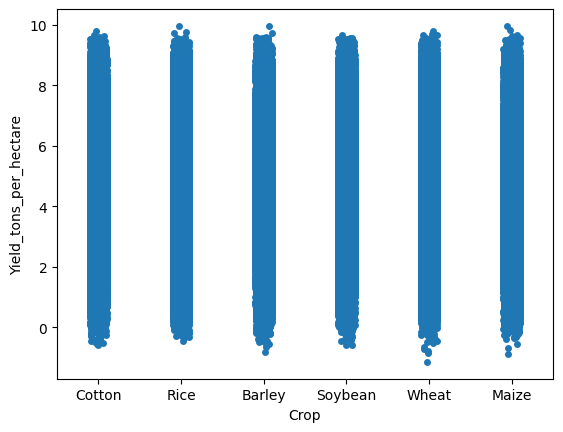

In [27]:
sb.stripplot(x='Crop',y='Yield_tons_per_hectare',data=dataset)
plt.show()

In [28]:
# This strip plot visualizes the distribution of crop yields across different crop types. 
# It helps identify which crops tend to have higher or more variable yields, providing insight into yield performance per crop.

# Strip Plot – Soil Type vs Yield

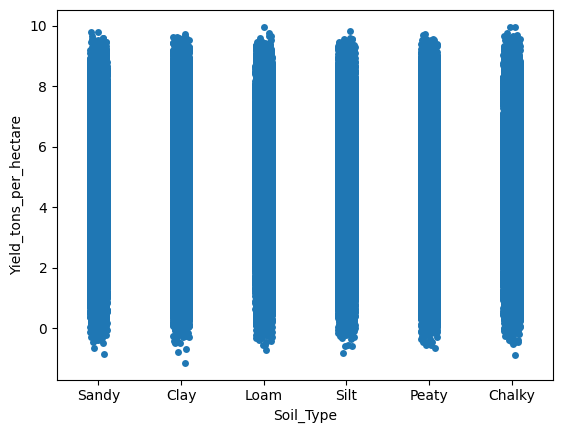

In [29]:
sb.stripplot(x='Soil_Type',y='Yield_tons_per_hectare',data=dataset)
plt.show()


In [30]:
# This plot shows the yield distribution across various soil types.
#  It allows us to evaluate which soil types are associated with higher yields and how consistent the yields are within each soil category.

# Bar Plot  – Crop vs Weather Condition (Hue: Soil Type)

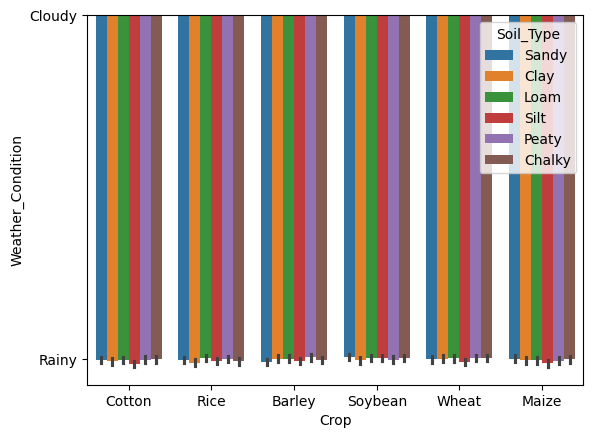

In [31]:
sb.barplot(x='Crop',y='Weather_Condition',data=dataset,hue='Soil_Type')
plt.show()

In [32]:
# This bar plot illustrates the frequency of different weather conditions observed for each crop, broken down by soil type.
#  It provides a multidimensional view of crop-soil-weather relationships.

# Count Plot – Soil Type by Region

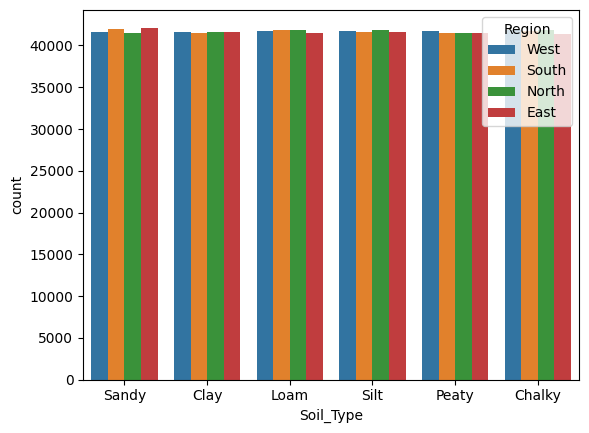

In [33]:
sb.countplot(x='Soil_Type',data=dataset,hue='Region');
plt.show()

In [34]:
# This count plot shows the number of observations of each soil type within different regions. 
# It's useful for understanding the distribution and prevalence of soil types across geographical areas.

#  Box Plot – Soil Type vs Yield (Hue: Region)

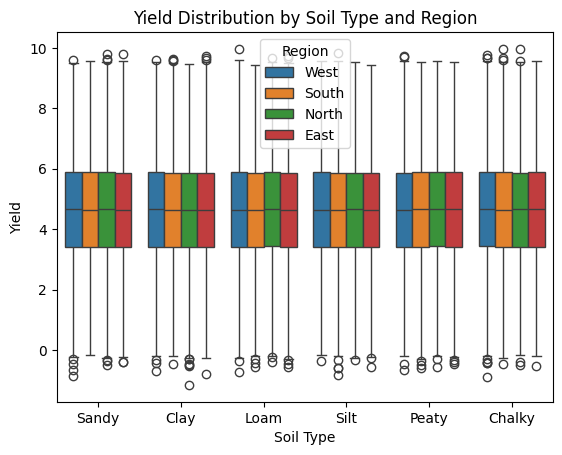

In [35]:

sb.boxplot(x='Soil_Type', y='Yield_tons_per_hectare', data=dataset, hue='Region')
plt.title('Yield Distribution by Soil Type and Region')
plt.xlabel('Soil Type')
plt.ylabel('Yield')
plt.show()

In [36]:
# This box plot displays the yield distribution for each soil type, categorized by region.
#  It’s effective for comparing median yields, interquartile ranges, and identifying outliers, highlighting regional variability in yield for each soil type.

#  Pie Chart – Unique Categories (Crop, Soil Type, Region)

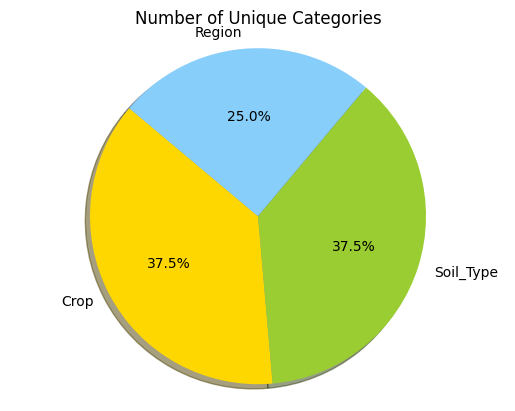

In [37]:
import matplotlib.pyplot as plt
import pandas as pd


# Get the number of unique categories for each label
unique_counts = [dataset['Crop'].nunique(),
                 dataset['Soil_Type'].nunique(),
                 dataset['Region'].nunique()]

labels = ['Crop', 'Soil_Type', 'Region']
colors = ['gold', 'yellowgreen', 'lightskyblue']

plt.pie(unique_counts, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Number of Unique Categories')
plt.axis('equal')
plt.show()

In [38]:
# The pie chart shows the proportion of unique categories among crop types, soil types, and regions.
#  It gives a quick overview of category diversity within the dataset.

# Scatter Plot  – Unique Category Counts

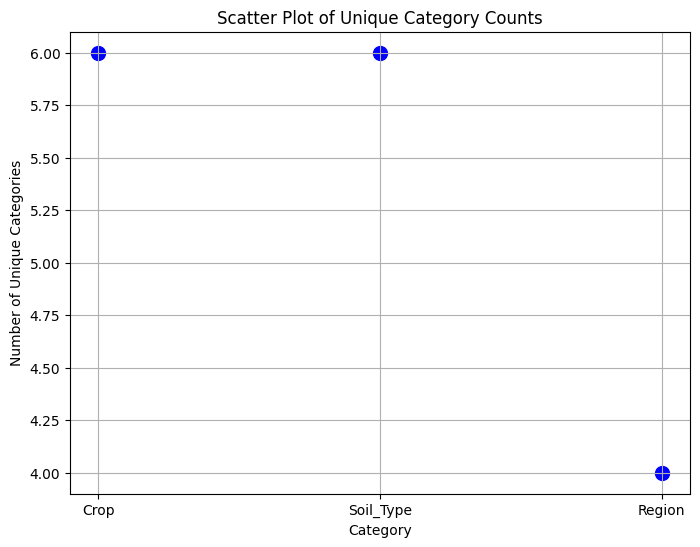

In [39]:
import matplotlib.pyplot as plt
import pandas as pd


unique_counts = [dataset['Crop'].nunique(),
                 dataset['Soil_Type'].nunique(),
                 dataset['Region'].nunique()]

labels = ['Crop', 'Soil_Type', 'Region']

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(labels, unique_counts, color='blue', marker='o', s=100)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Number of Unique Categories')
plt.title('Scatter Plot of Unique Category Counts')

# Show the plot
plt.grid(True)
plt.show()

In [40]:
# This scatter plot displays the number of unique values for Crop, Soil Type, and Region. 
#  It serves as a simple comparison to visualize categorical diversity across dataset features.